<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n250.csv',
 'data_add_delta_-1.2_n120.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.345123,79.159216,49.760532,-0.030741,173.234130,173.237233,-0.003103
1,0.0,1.0,85.755530,75.757850,63.162529,0.073820,234.749728,234.671198,0.078530
2,0.0,2.0,91.911626,35.334151,97.366906,0.255473,234.868156,234.678051,0.190105
3,0.0,3.0,57.442499,60.758059,98.188231,0.080560,226.469349,226.446816,0.022533
4,0.0,4.0,35.067634,73.652935,70.620707,0.144053,189.485330,189.349737,0.135592
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.717245,86.723220,53.552921,0.020840,185.014225,185.017611,-0.003386
29996,999.0,26.0,34.942692,41.844215,88.690972,-0.122842,175.355037,175.439548,-0.084511
29997,999.0,27.0,38.659604,84.416221,64.307253,-0.012406,197.370672,197.401068,-0.030396
29998,999.0,28.0,75.919770,97.424823,40.309709,-0.005870,223.648431,223.669860,-0.021428


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.345123,79.159216,49.760532,-0.030741,173.234130,173.237233,-0.003103
1,0.0,1.0,85.755530,75.757850,63.162529,0.073820,234.749728,234.671198,0.078530
2,0.0,2.0,91.911626,35.334151,97.366906,0.255473,234.868156,234.678051,0.190105
3,0.0,3.0,57.442499,60.758059,98.188231,0.080560,226.469349,226.446816,0.022533
4,0.0,4.0,35.067634,73.652935,70.620707,0.144053,189.485330,189.349737,0.135592
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.717245,86.723220,53.552921,0.020840,185.014225,185.017611,-0.003386
29996,999.0,26.0,34.942692,41.844215,88.690972,-0.122842,175.355037,175.439548,-0.084511
29997,999.0,27.0,38.659604,84.416221,64.307253,-0.012406,197.370672,197.401068,-0.030396
29998,999.0,28.0,75.919770,97.424823,40.309709,-0.005870,223.648431,223.669860,-0.021428


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    34.345123  79.159216  49.760532 -0.030741  173.234130   
      1.0    85.755530  75.757850  63.162529  0.073820  234.749728   
      2.0    91.911626  35.334151  97.366906  0.255473  234.868156   
      3.0    57.442499  60.758059  98.188231  0.080560  226.469349   
      4.0    35.067634  73.652935  70.620707  0.144053  189.485330   
...                ...        ...        ...       ...         ...   
999.0 25.0   34.717245  86.723220  53.552921  0.020840  185.014225   
      26.0   34.942692  41.844215  88.690972 -0.122842  175.355037   
      27.0   38.659604  84.416221  64.307253 -0.012406  197.370672   
      28.0   75.919770  97.424823  40.309709 -0.005870  223.648431   
      29.0   67.993393  86.862913  94.878325  0.040863  259.775494   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.237233 -0.003103  
      1.0    234.671198  0.078530  
      2.0    234.678051  0.190105  
      3.0    226.446816  0.022533  
      4.0    189.349737  0.135592  
...                 ...       ...  
999.0 25.0   185.017611 -0.003386  
      26.0   175.439548 -0.084511  
      27.0   197.401068 -0.030396  
      28.0   223.669860 -0.021428  
      29.0   259.736307  0.039187  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    34.345123  79.159216  49.760532 -0.030741  173.234130   
      1.0    85.755530  75.757850  63.162529  0.073820  234.749728   
      2.0    91.911626  35.334151  97.366906  0.255473  234.868156   
      3.0    57.442499  60.758059  98.188231  0.080560  226.469349   
      4.0    35.067634  73.652935  70.620707  0.144053  189.485330   
...                ...        ...        ...       ...         ...   
999.0 25.0   34.717245  86.723220  53.552921  0.020840  185.014225   
      26.0   34.942692  41.844215  88.690972 -0.122842  175.355037   
      27.0   38.659604  84.416221  64.307253 -0.012406  197.370672   
      28.0   75.919770  97.424823  40.309709 -0.005870  223.648431   
      29.0   67.993393  86.862913  94.878325  0.040863  259.775494   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.237233 -0.003103  
      1.0    234.671198  0.078530  
      2.0    234.678051  0.190105  
      3.0    226.446816  0.022533  
      4.0    189.349737  0.135592  
...                 ...       ...  
999.0 25.0   185.017611 -0.003386  
      26.0   175.439548 -0.084511  
      27.0   197.401068 -0.030396  
      28.0   223.669860 -0.021428  
      29.0   259.736307  0.039187  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.345123,79.159216,49.760532,-0.030741,173.234130,173.237233,-0.003103
1,0.0,1.0,85.755530,75.757850,63.162529,0.073820,234.749728,234.671198,0.078530
2,0.0,2.0,91.911626,35.334151,97.366906,0.255473,234.868156,234.678051,0.190105
3,0.0,3.0,57.442499,60.758059,98.188231,0.080560,226.469349,226.446816,0.022533
4,0.0,4.0,35.067634,73.652935,70.620707,0.144053,189.485330,189.349737,0.135592
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.717245,86.723220,53.552921,0.020840,185.014225,185.017611,-0.003386
29996,999.0,26.0,34.942692,41.844215,88.690972,-0.122842,175.355037,175.439548,-0.084511
29997,999.0,27.0,38.659604,84.416221,64.307253,-0.012406,197.370672,197.401068,-0.030396
29998,999.0,28.0,75.919770,97.424823,40.309709,-0.005870,223.648431,223.669860,-0.021428


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    34.345123  79.159216  49.760532 -0.030741  173.234130   
      1.0    85.755530  75.757850  63.162529  0.073820  234.749728   
      2.0    91.911626  35.334151  97.366906  0.255473  234.868156   
      3.0    57.442499  60.758059  98.188231  0.080560  226.469349   
      4.0    35.067634  73.652935  70.620707  0.144053  189.485330   
...                ...        ...        ...       ...         ...   
999.0 25.0   34.717245  86.723220  53.552921  0.020840  185.014225   
      26.0   34.942692  41.844215  88.690972 -0.122842  175.355037   
      27.0   38.659604  84.416221  64.307253 -0.012406  197.370672   
      28.0   75.919770  97.424823  40.309709 -0.005870  223.648431   
      29.0   67.993393  86.862913  94.878325  0.040863  259.775494   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.237233 -0.003103  
      1.0    234.671198  0.078530  
      2.0    234.678051  0.190105  
      3.0    226.446816  0.022533  
      4.0    189.349737  0.135592  
...                 ...       ...  
999.0 25.0   185.017611 -0.003386  
      26.0   175.439548 -0.084511  
      27.0   197.401068 -0.030396  
      28.0   223.669860 -0.021428  
      29.0   259.736307  0.039187  

[30000 rows x 7 columns]

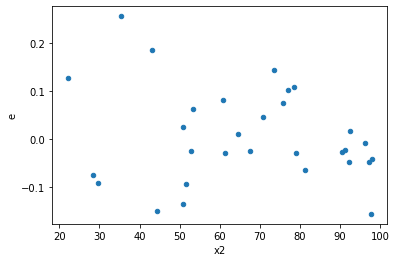

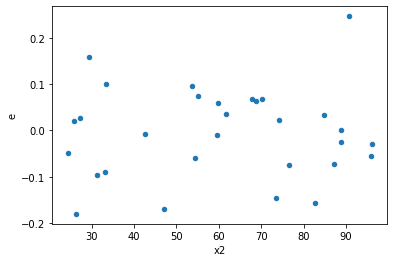

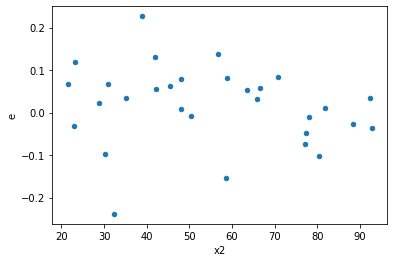

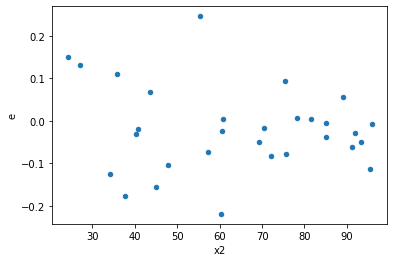

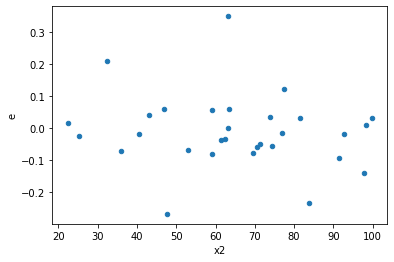

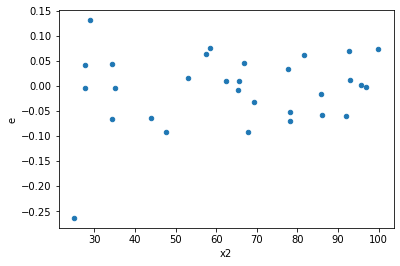

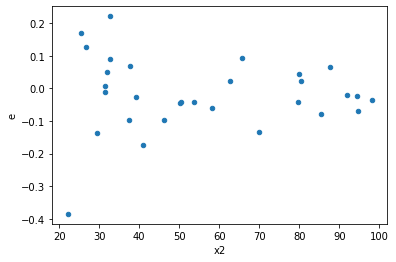

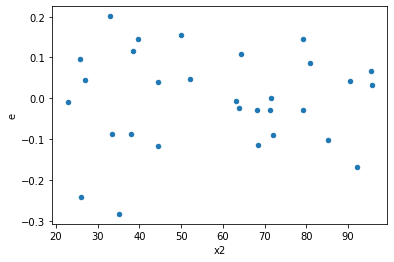

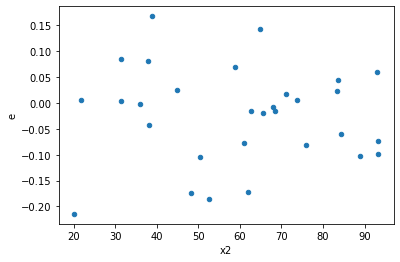

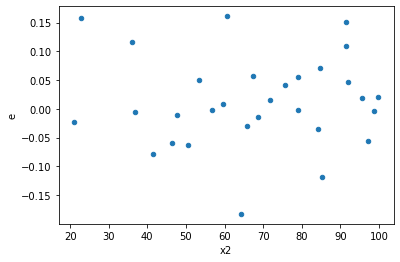

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,0.08734456178440171,0.0978093130766466,0.009704951309377968,0.010867701452960734,1.1198099924993123,0.8689006679620195,0.5655496660189903,0.43445033398100974,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.07288569801940543,0.08570400592931326,0.008098410891045049,0.009522667325479251,1.1758686307222443,0.8132454142988543,0.5933772928505728,0.40662270714942716,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.0754523537869629,0.0841039270575544,0.0083835948652181,0.009344880784172711,1.114662735307356,0.8741902544140943,0.5629048727929529,0.43709512720704713,Reject001=1 : Homoscedasticity
12.0,9.0,9.0,0.06320128299052685,0.07779370068864983,0.0070223647767252055,0.008643744520961092,1.2308879979590006,0.762026721936423,0.6189866390317885,0.3810133609682115,Reject001=1 : Homoscedasticity
15.0,9.0,9.0,0.04837657959450825,0.0892167126854636,0.005375175510500917,0.009912968076162623,1.8442129111499141,0.37542862354795536,0.8122856882260223,0.18771431177397768,Reject001=1 : Homoscedasticity
19.0,9.0,9.0,0.025606682376478136,0.04866656648986706,0.002845186930719793,0.005407396276651895,1.9005416544929434,0.35276692100279483,0.8236165394986026,0.17638346050139742,Reject001=1 : Homoscedasticity
22.0,9.0,9.0,0.01777217519193256,0.051802650513907526,0.0019746861324369514,0.005755850057100836,2.914817682948716,0.12679715001802827,0.9366014249909859,0.06339857500901414,Reject001=1 : Homoscedasticity
30.0,9.0,9.0,0.0183276617177603,0.10296134668635118,0.002036406857528922,0.011440149631816797,5.617811386521673,0.01696466456876511,0.9915176677156174,0.008482332284382554,Reject001=1 : Homoscedasticity
31.0,9.0,9.0,0.024058673931921026,0.0657255402663123,0.0026731859924356695,0.007302837807368034,2.731885408659524,0.15046126859548803,0.924769365702256,0.07523063429774401,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.08734456178440171,0.0978093130766466,0.009704951309377968,0.010867701452960734,1.1198099924993123,0.8689006679620195,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.07288569801940543,0.08570400592931326,0.008098410891045049,0.009522667325479251,1.1758686307222443,0.8132454142988543,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.06469010321409811,0.02781745178425641,0.007187789246010902,0.00309082797602849,0.4300109352460279,0.22465492301242038,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.051763044007623764,0.032259844076249634,0.005751449334180418,0.0035844271195832928,0.6232215414437053,0.49220480437112046,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.07694465855162605,0.010256843197893762,0.008549406505736228,0.001139649244210418,0.13330156233017693,0.006112085050922319,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,0.08562348478396943,0.030414688160167846,0.00951372053155216,0.0033794097955742054,0.3552143227632582,0.13908365266564027,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.2481819864905082,0.0378160250483195,0.027575776276723134,0.004201780560924389,0.15237215876570392,0.009882979739542344,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,0.0754523537869629,0.0841039270575544,0.0083835948652181,0.009344880784172711,1.114662735307356,0.8741902544140943,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.09515801240688648,0.04684315026101671,0.010573112489654054,0.005204794473446301,0.49226701016746666,0.30592232849005596,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      954
Reject001=0 : Heteroscedasticity     46
Name: Result_test, dtype: int64